# Home Assignment 2
## Using Filters

Importing required libraries

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

Load the image in grayscale

In [39]:
image = cv2.imread("iitk.png", cv2.IMREAD_GRAYSCALE)
h, w = image.shape

Compute integral image

In [40]:
integral = cv2.integral(image)[1:, 1:]

Define multiple 4x4 filters (masks) as given in Home Assignment

In [41]:
filters = [
    np.array([[-1, -1,  1,  1],
              [-1, -1,  1,  1],
              [ 1,  1, -1, -1],
              [ 1,  1, -1, -1]], dtype=np.float32),
    
    np.array([[-1, -1, -1, -1],
              [-1, -1, -1, -1],
              [ 1,  1,  1,  1],
              [ 1,  1,  1,  1]], dtype=np.float32),

    np.array([[-1, -1,  1,  1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1]], dtype=np.float32),

    np.array([[ 1,  1, -1, -1],
              [ 1,  1, -1, -1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1]], dtype=np.float32),

    np.array([[-1, -1, -1, -1],
              [-1, -1, -1, -1],
              [-1, -1,  1,  1],
              [-1, -1,  1,  1]], dtype=np.float32),

    np.array([[ 1,  1,  1,  1],
              [ 1, -1, -1, -1],
              [ 1, -1, -1, -1],
              [ 1, -1, -1, -1]], dtype=np.float32)
]

Predefine filter regions (positive/negative rectangles) for calculations

In [42]:
filter_regions = [
    {'pos': [(2,0,3,1), (0,2,1,3)], 'neg': [(0,0,1,1), (2,2,3,3)]},
    {'pos': [(0,2,3,3)], 'neg': [(0,0,3,1)]},
    {'pos': [(2,0,3,3)], 'neg': [(0,0,1,3)]},
    {'pos': [(0,0,1,1), (2,2,3,3)], 'neg': [(2,0,3,1), (0,2,1,3)]},
    {'pos': [(2,2,3,3)], 'neg': [(0,0,3,1), (0,2,1,3)]},
    {'pos': [(0,0,3,0), (0,1,0,3)], 'neg': [(1,1,3,3)]}
]

### Applying Haas Response using Integral Image

Funtion to compute cost / sum

In [43]:
def compute_sum(integral, x, y, region):
    x1, y1, x2, y2 = region
    return integral[y+y2, x+x2] - integral[y+y1, x+x2] - integral[y+y2, x+x1] + integral[y+y1, x+x1]

Process each filter

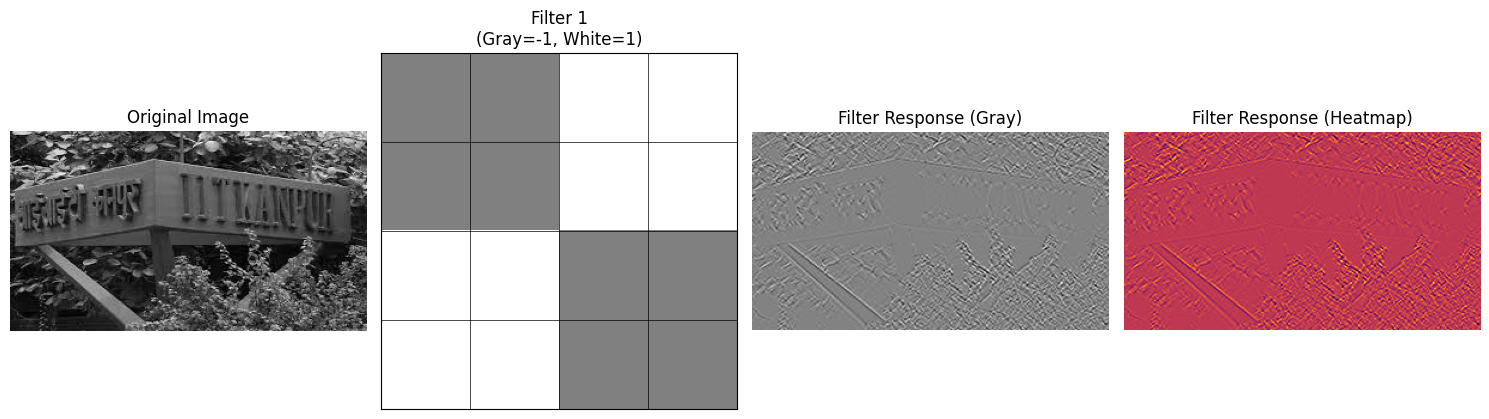

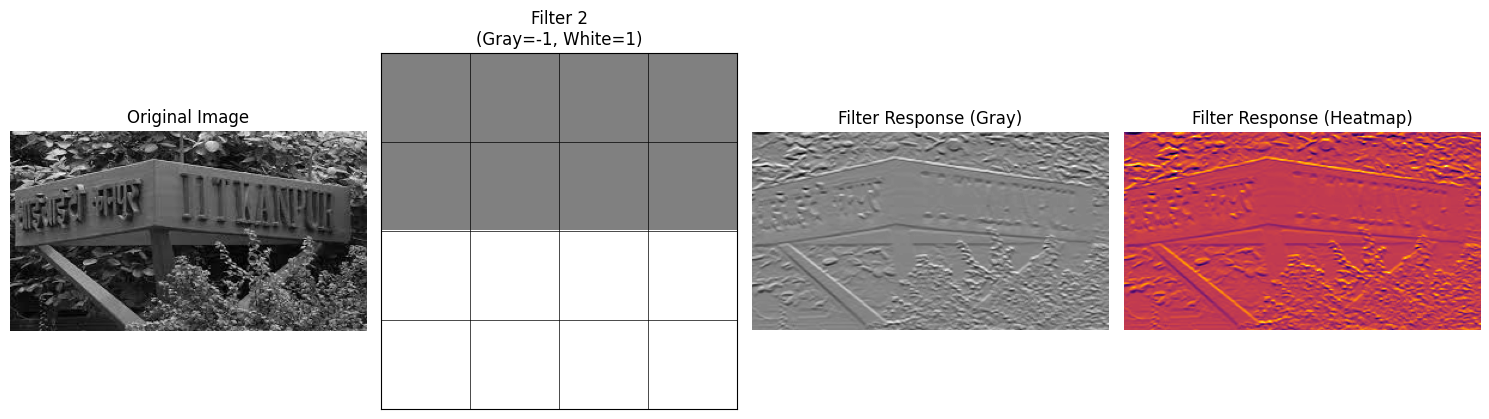

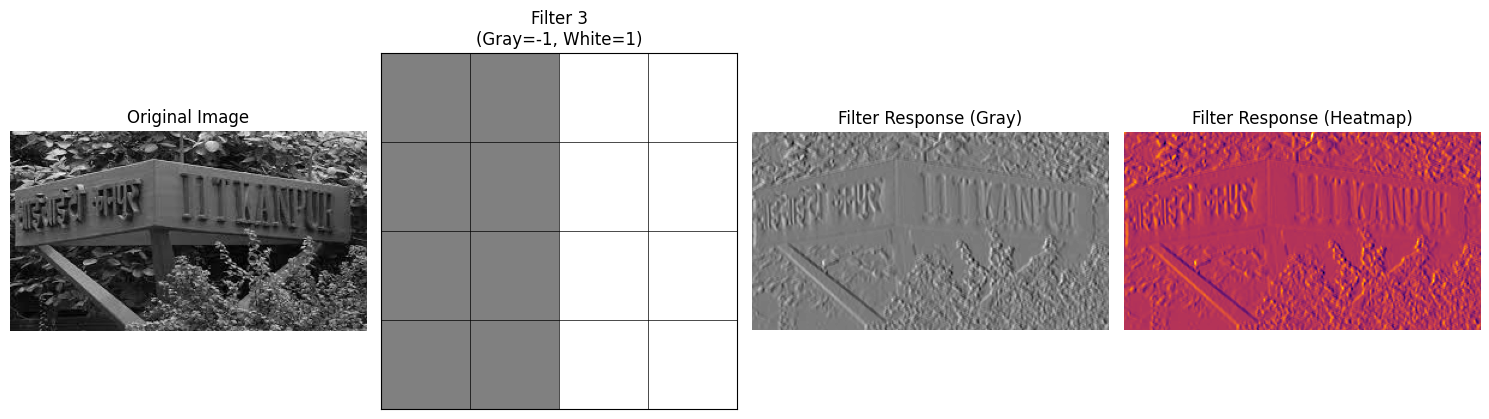

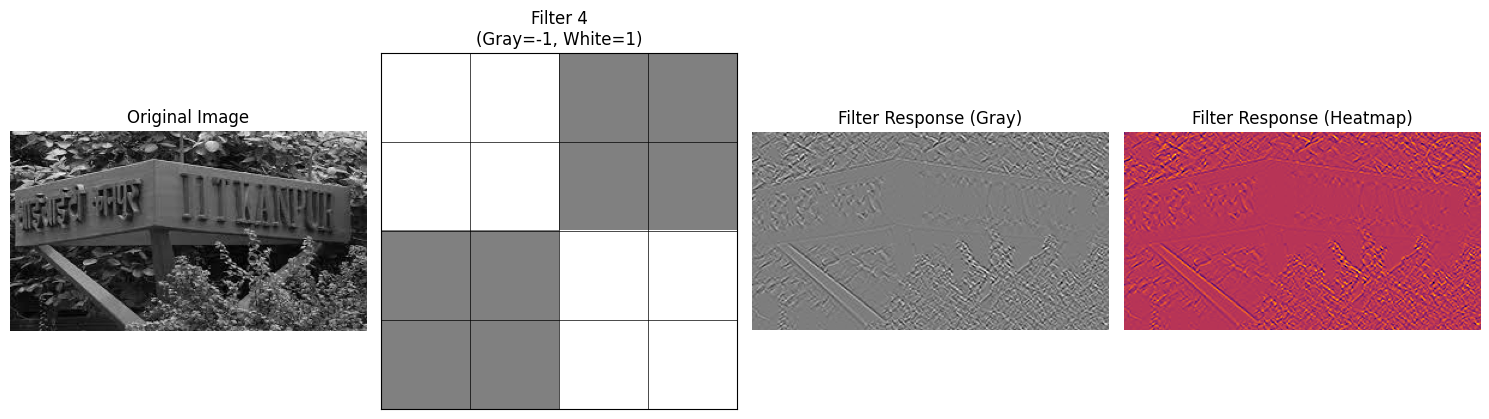

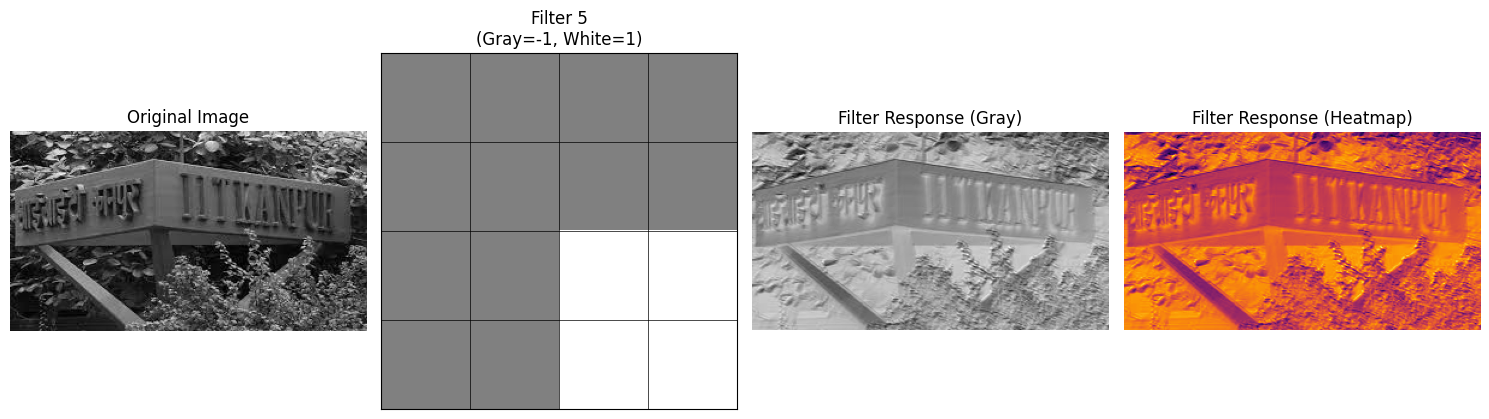

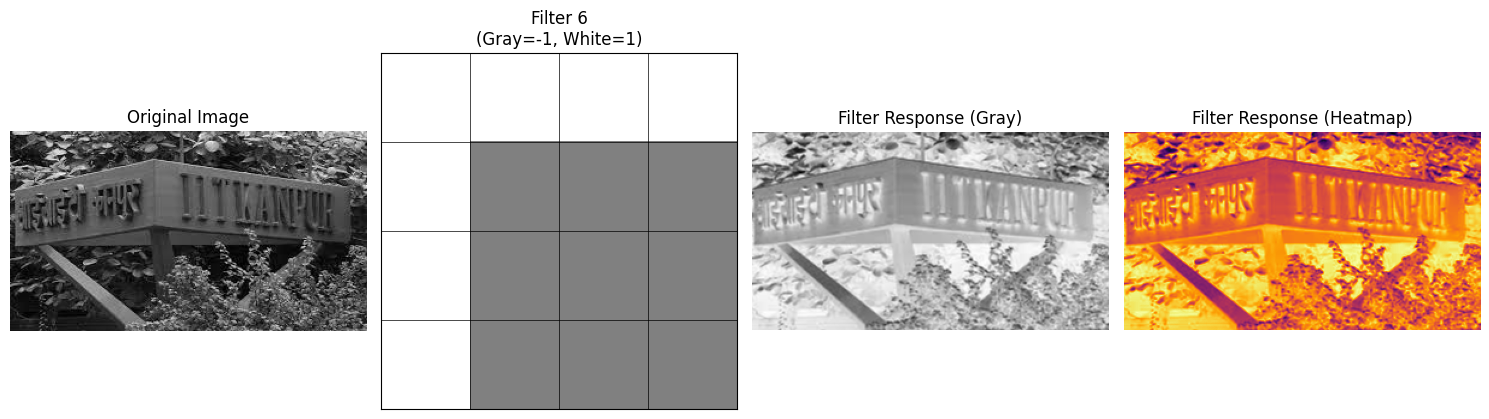

In [44]:
for idx, (kernel, regions) in enumerate(zip(filters, filter_regions)):
    # Initialize response matrix
    response = np.zeros((h-4+1, w-4+1), dtype=np.float32)
    
    # Compute response for each pixel
    for y in range(response.shape[0]):
        for x in range(response.shape[1]):
            pos_sum = sum(compute_sum(integral, x, y, r) for r in regions['pos'])
            neg_sum = sum(compute_sum(integral, x, y, r) for r in regions['neg'])
            response[y, x] = pos_sum - neg_sum
            
    cv2.imwrite(f"iitk_integral_filter_{idx+1}.png", response)
    
    # Visualization
    fig = plt.figure(figsize=(15, 5))
    
    # Original image
    plt.subplot(1, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Filter visualization
    plt.subplot(1, 4, 2)
    cmap = ListedColormap(['#808080', '#ffffff'])
    plt.imshow(kernel, cmap=cmap, vmin=-1, vmax=1, interpolation='nearest')
    plt.title(f'Filter {idx+1}\n(Gray=-1, White=1)')
    plt.xticks(np.arange(-0.5, 4, 1), minor=True)
    plt.yticks(np.arange(-0.5, 4, 1), minor=True)
    plt.grid(which='minor', color='black', linestyle='-', linewidth=0.5)
    # Hide axis labels but keep grid visible
    plt.tick_params(axis='both', which='both', length=0)
    plt.xticks([])
    plt.yticks([])
    
    # Grayscale result
    plt.subplot(1, 4, 3)
    plt.imshow(response, cmap='gray')
    plt.title('Filter Response (Gray)')
    plt.axis('off')
    
    # Heatmap result
    plt.subplot(1, 4, 4)
    plt.imshow(response, cmap='inferno')
    plt.title('Filter Response (Heatmap)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()